In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio

In [2]:
df=pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Descriptive Statistics of Dataset

In [3]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Information of type of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.shape

(8128, 13)

# Finding out the number of null values

In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

As we can see the null values in the dataset, we need to deal with them inorder to proceed further.

In [7]:
df[df.torque.isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


As we can see for all the torque null values, mileage, engine, max_power and seats also have null values in the data. We can drop these rows from the dataset

In [8]:
df=df[~(df.torque.isnull())]
df.shape

(7906, 13)

In [9]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Finally we have 7906 rows in the dataset after removing these null value rows

In [10]:
# Converting mileage column dtype to numerical
df.mileage = df.mileage.apply(lambda x:float(x.split(' ')[0]))
df.mileage.dtype

dtype('float64')

In [11]:
# converting engine column dtype to int
df.engine = df.engine.apply(lambda x:int(x.split(' ')[0]))
df.engine.dtype

dtype('int64')

In [12]:
# converting max_power datatype
df.max_power = df.max_power.apply(lambda x:float(x.split(' ')[0]))
df.max_power.dtype

dtype('float64')

Dropping torque column since the data have different type of units and different representation

In [13]:
df.drop('torque',axis=1,inplace=True)

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [17]:
df.name.value_counts().head(10)

Maruti Swift Dzire VDI        129
Maruti Alto 800 LXI            82
Maruti Alto LXi                71
BMW X4 M Sport X xDrive20d     62
Maruti Swift VDI               61
Maruti Wagon R LXI             53
Maruti Alto K10 VXI            50
Hyundai EON Era Plus           48
Maruti Ertiga VDI              45
Maruti Wagon R VXI BS IV       45
Name: name, dtype: int64

As we can see Maruti Swift Dzire VDI is the most selling car.

# EDA

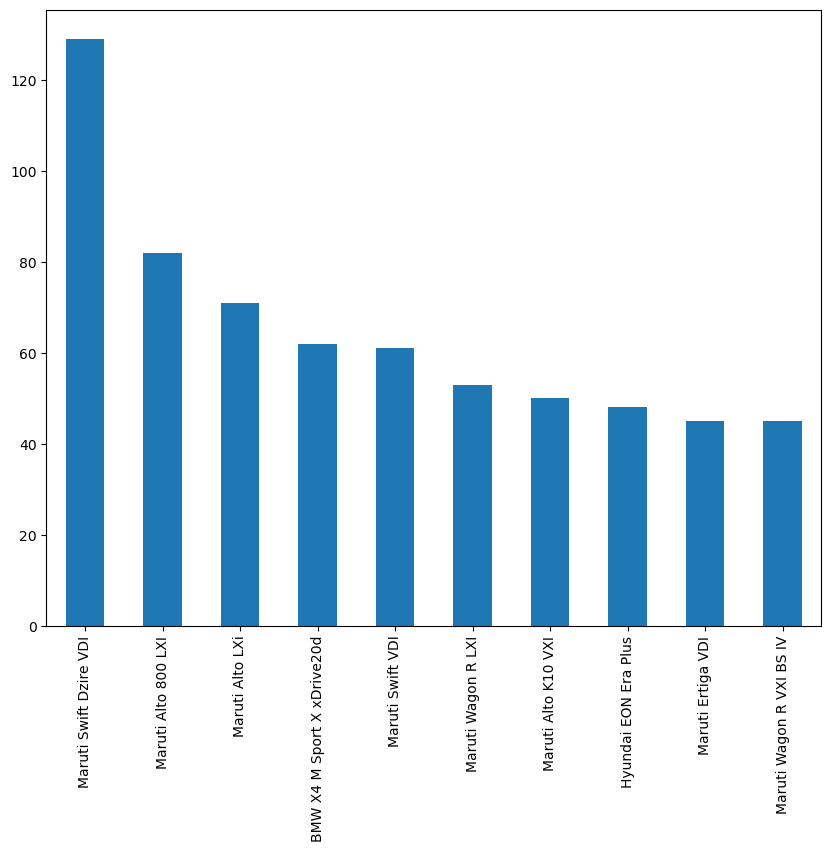

In [19]:
# count plot for top 10 most sold cars
plt.figure(figsize=[10,8])
df.name.value_counts().head(10).plot(kind='bar')
plt.show()

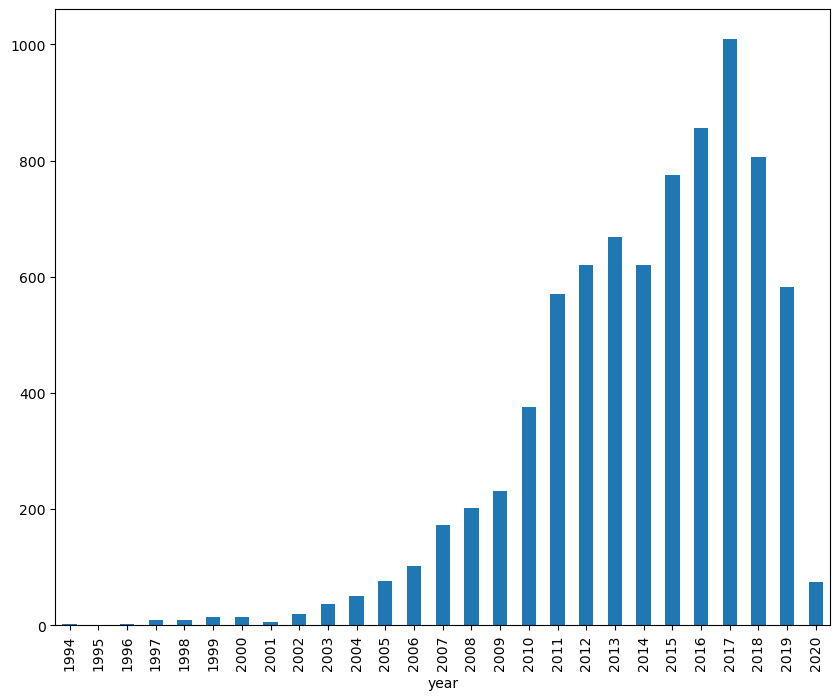

In [20]:
plt.figure(figsize=[10,8])
df.groupby('year').count()['name'].plot(kind = 'bar')
plt.show()

Customers who bought the cars in years 2015-2018 are getting sold mostly

C:\Users\rutuj\AppData\Local\Temp\ipykernel_8272\426682564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.selling_price)


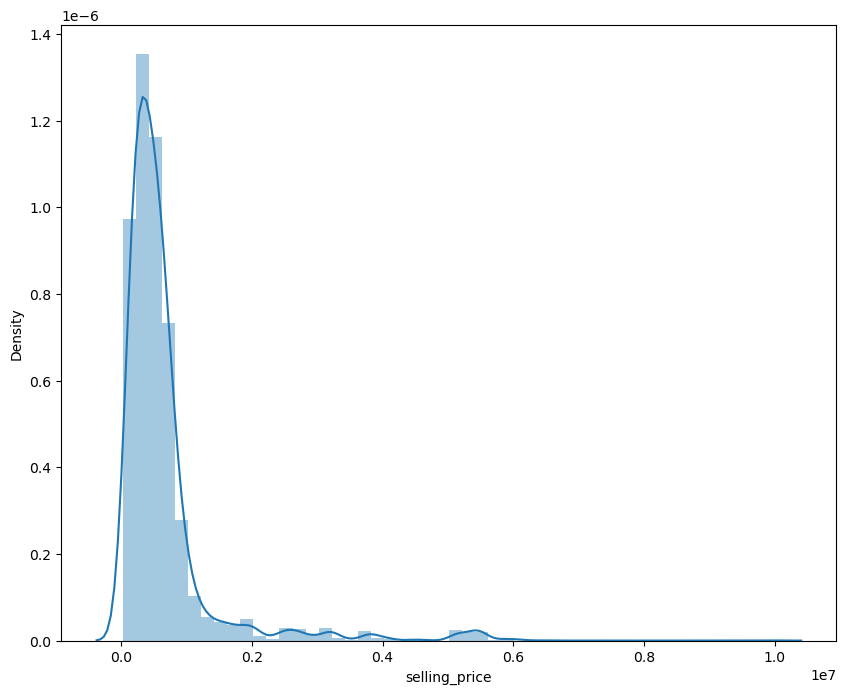

In [21]:
# distribution of selling price
plt.figure(figsize=[10,8])
sns.distplot(df.selling_price)
plt.show()

As we can see that distribution of selling price is slightly right skewed

C:\Users\rutuj\AppData\Local\Temp\ipykernel_8272\2105994183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.km_driven)


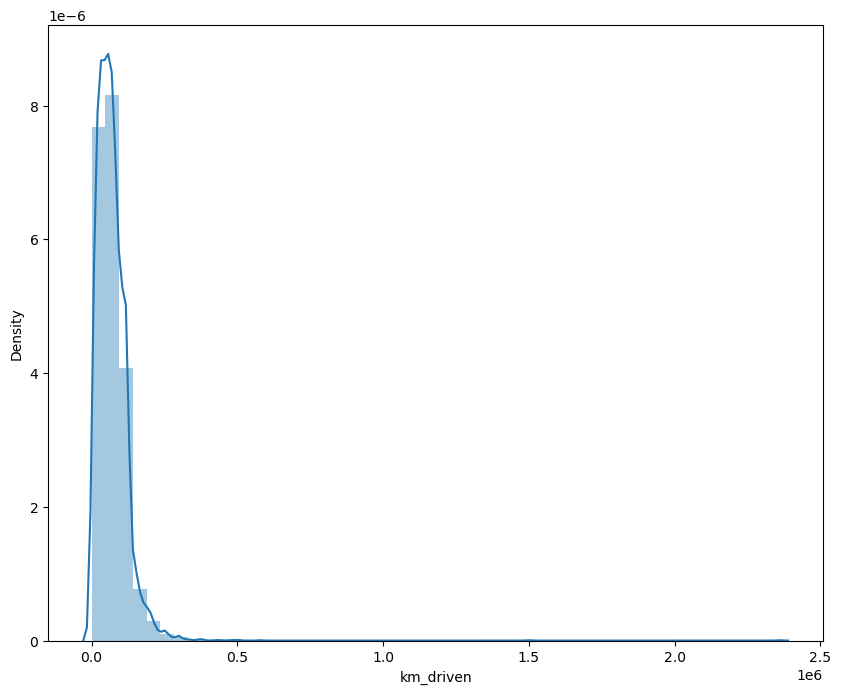

In [22]:
# distribution of km_driven
plt.figure(figsize=[10,8])
sns.distplot(df.km_driven)
plt.show()

As we can see that the most of the km_driven values are below approximately 4 lakhs

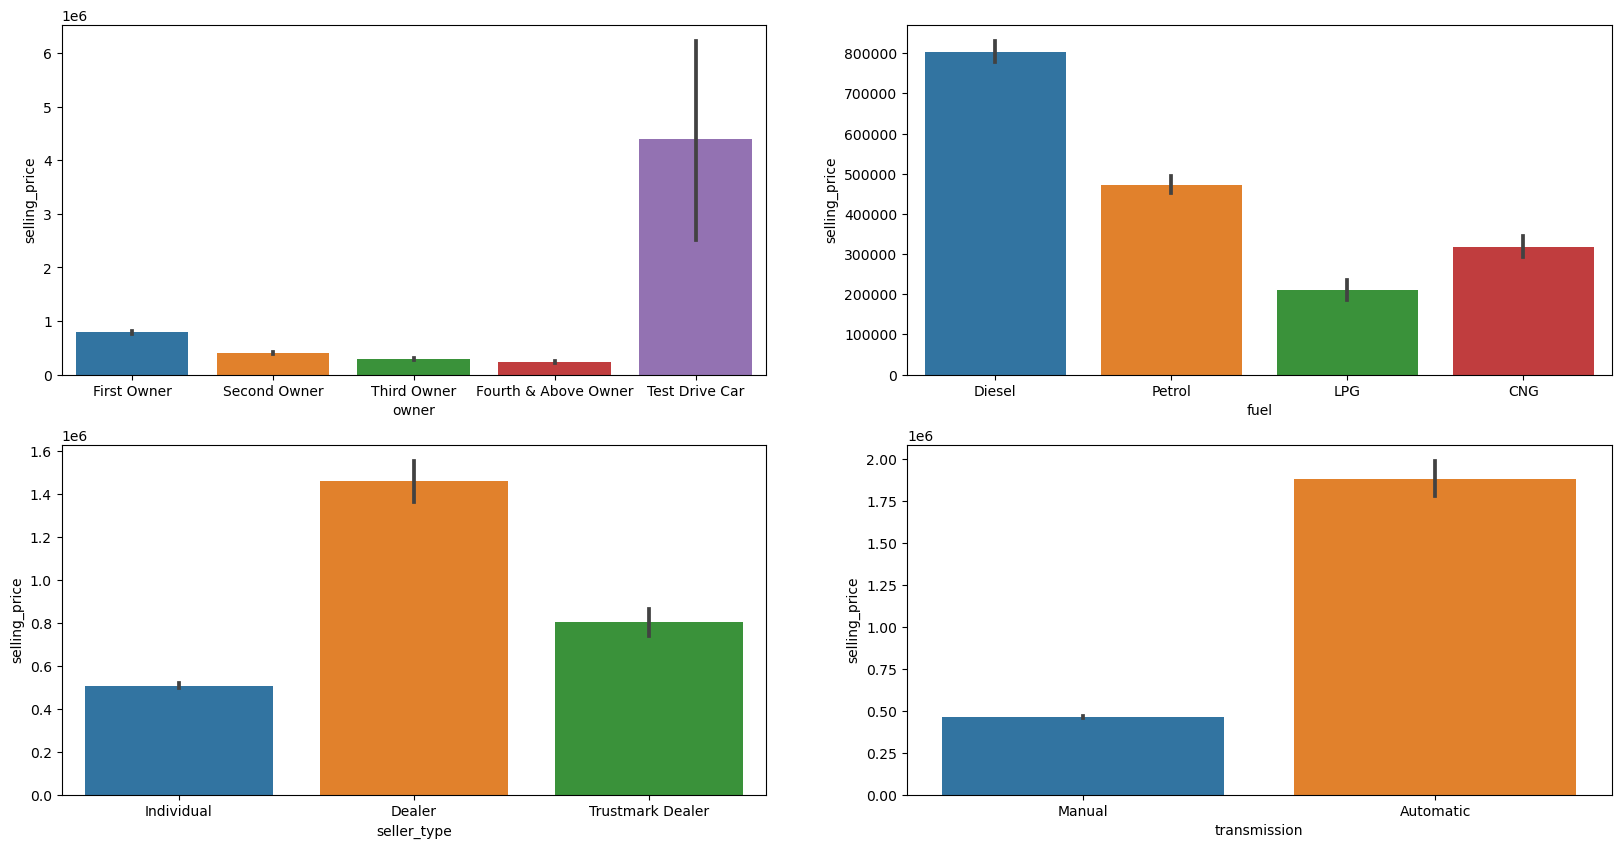

In [37]:
# plotting categorical variables vs target variable selling price
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.barplot(x=df['owner'], y=df['selling_price'])
plt.subplot(2,2,2)
sns.barplot(x=df['fuel'], y=df['selling_price'])
plt.subplot(2,2,3)
sns.barplot(x=df['seller_type'], y=df['selling_price'])
plt.subplot(2,2,4)
sns.barplot(x=df['transmission'], y=df['selling_price'])
plt.show()

1. Test_drive cars has highest selling price
2. Diesel cars selling price is high
3. Dealer type selling price is more compared to individual sellertype
4. As we can see that automatic cars selling price is high.

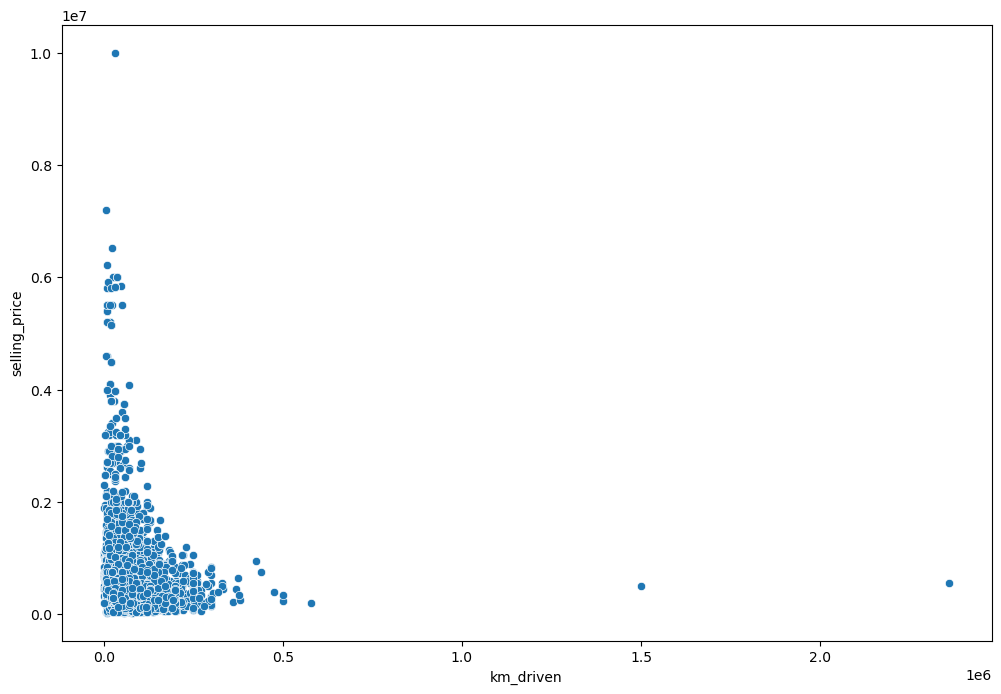

In [38]:
# km_driven vs selling_price
plt.figure(figsize=[12,8])
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

1. As we can see km_driven has outliers above 10 lakhs kms. Removing these records from the dataset
2. As we can see that if the km_driven increases the selling price is getting decreased

In [39]:
df = df[~(df.km_driven > 1000000)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [40]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

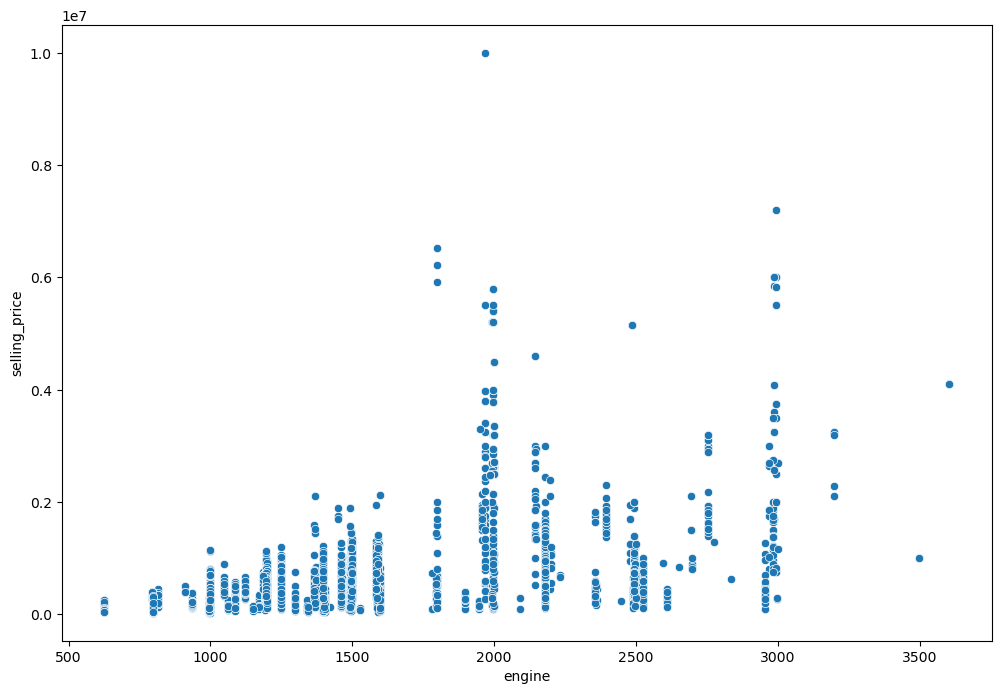

In [41]:
# engine vs selling_price
plt.figure(figsize=[12,8])
sns.scatterplot(x=df['engine'], y=df['selling_price'])
plt.show()

As we can see engine has outliers above 3400 cc. Removing these records from the dataset

In [42]:
df = df[~(df.engine > 3400)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


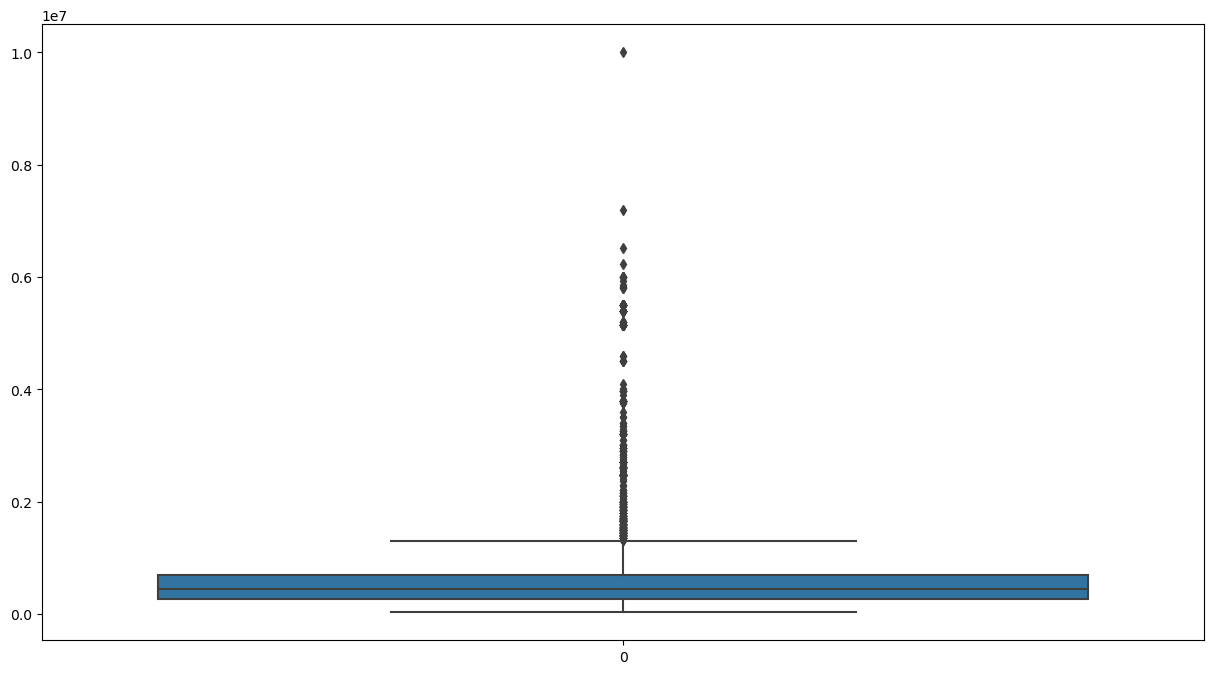

In [43]:
#boxplot for selling_price
plt.figure(figsize=[15,8])
sns.boxplot(df.selling_price)
plt.show()

As we can see mostly outliers are above 50 lakhs so removing these records from the dataset

In [44]:
df = df[~(df.selling_price > 5000000)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


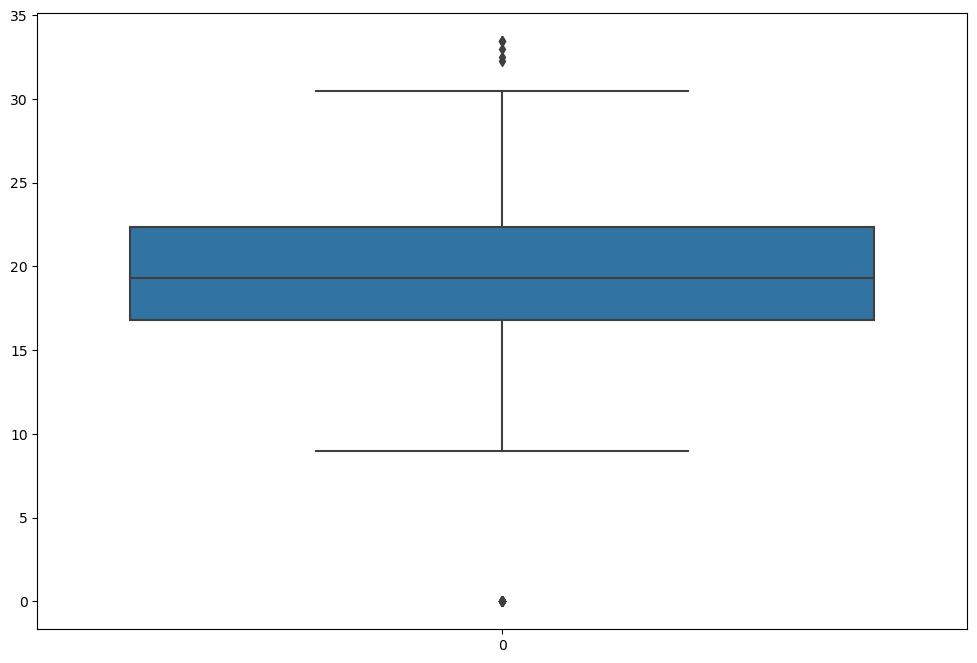

In [45]:
# boxplot for mileage
plt.figure(figsize=[12,8])
sns.boxplot(df.mileage)
plt.show()

Removing the outliers from mileage column, >32.5 and <5

In [46]:
df = df[~((df.mileage > 32.5) | (df.mileage <5))]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


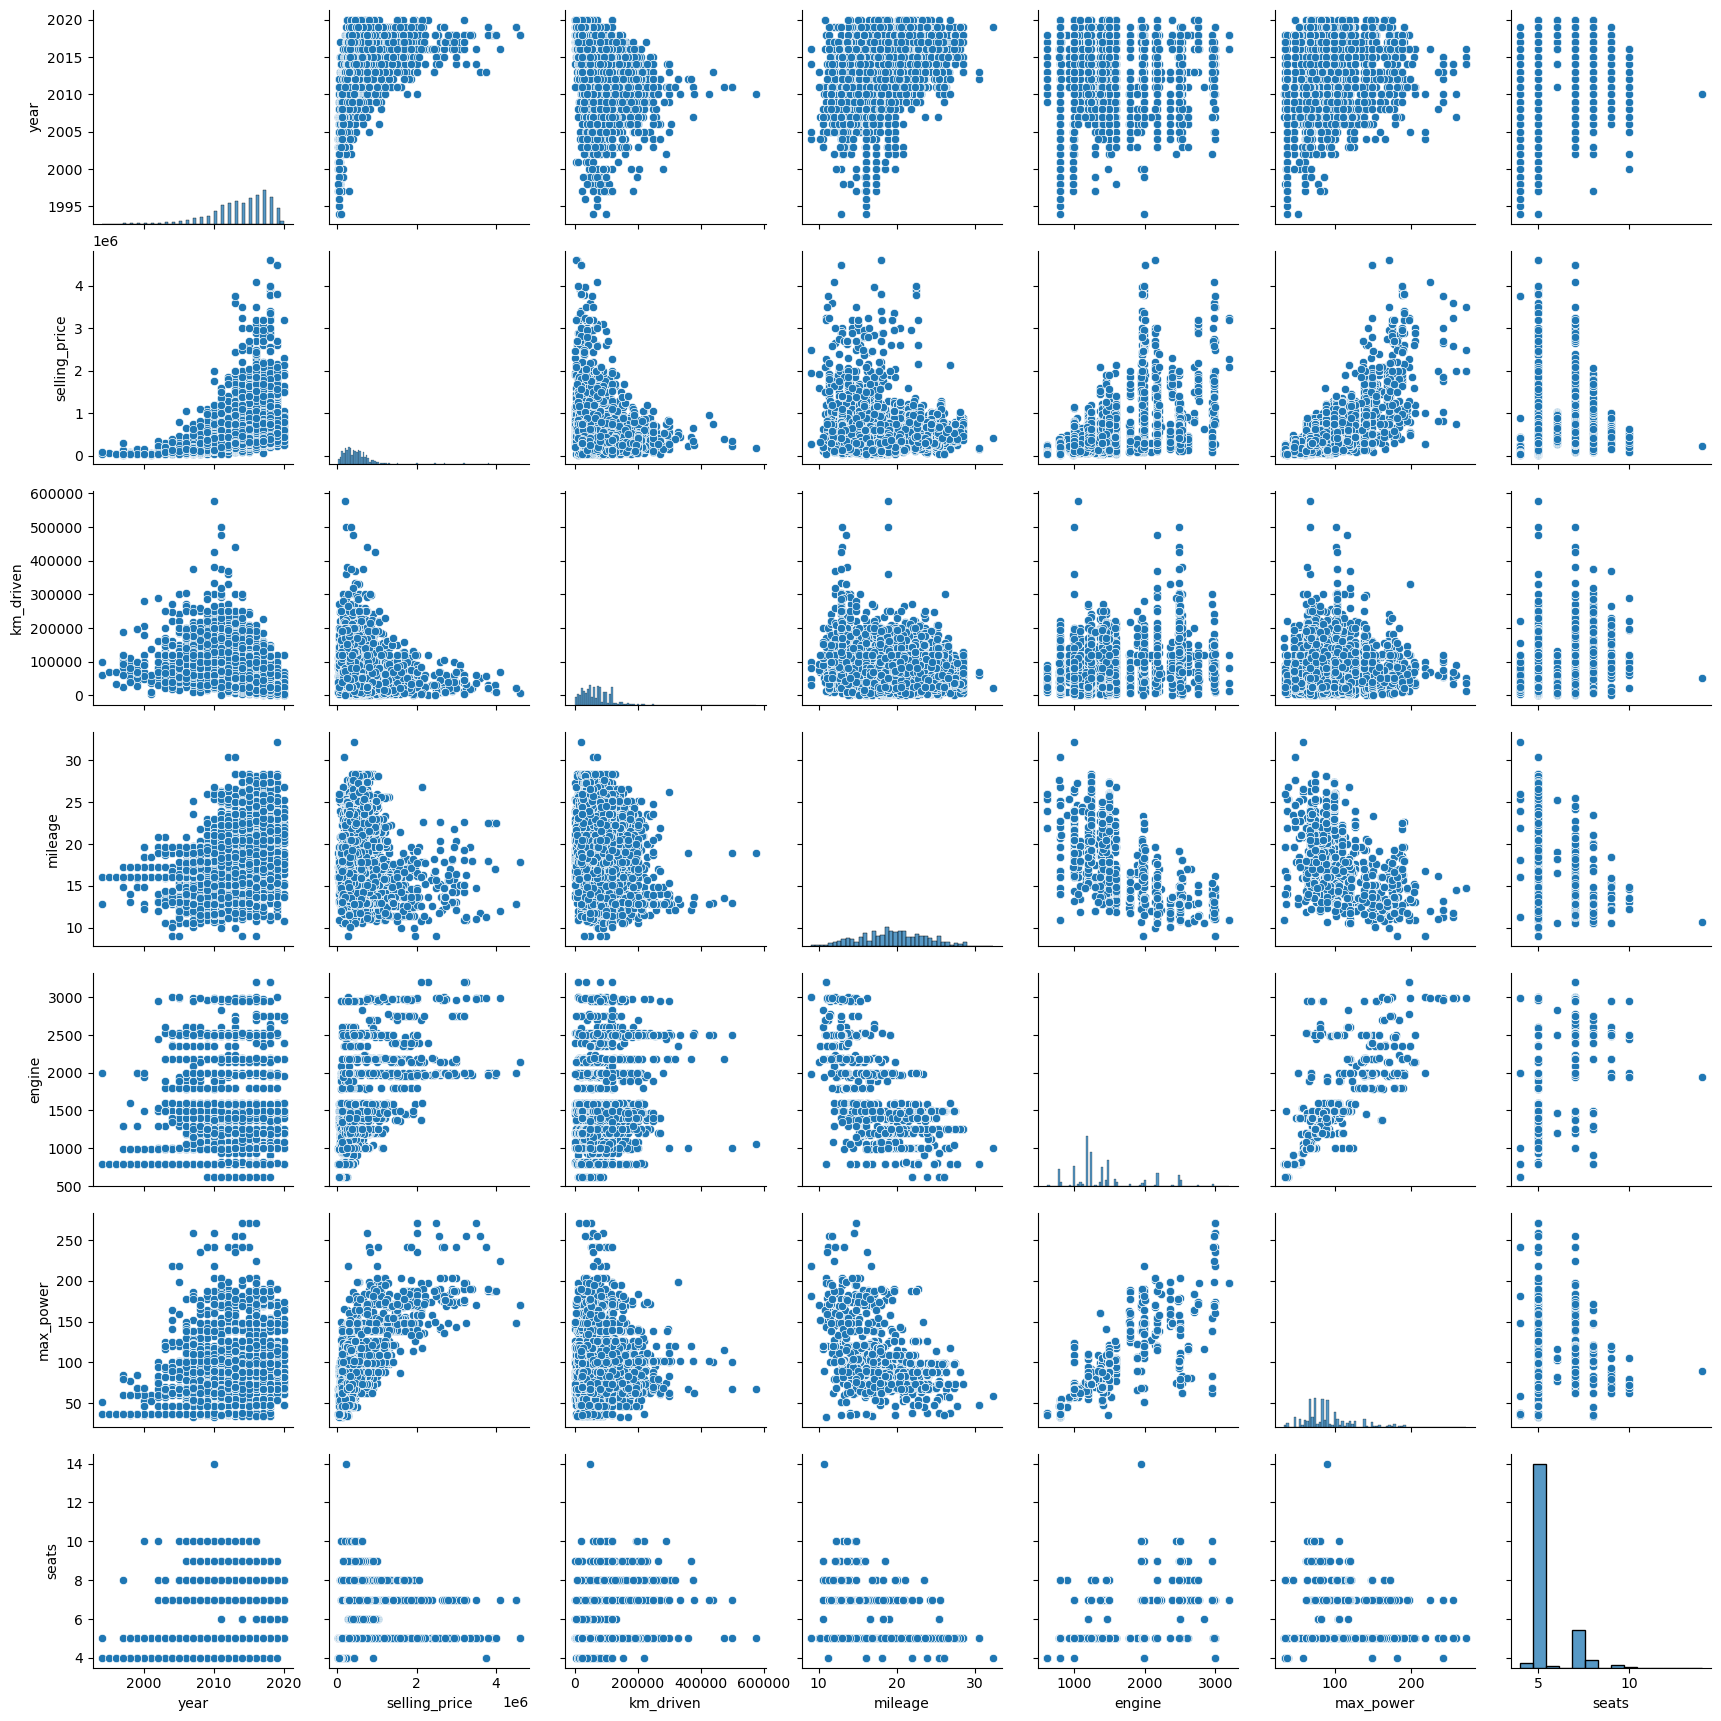

In [47]:
# looking at pair plot for numerical data
sns.pairplot(df)
plt.show()

In [48]:
# correlation between numerical variables in the data
df.corr()

C:\Users\rutuj\AppData\Local\Temp\ipykernel_8272\4267476371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.449973,-0.483149,0.345563,-0.012886,0.185943,0.002526
selling_price,0.449973,1.000000,-0.238611,-0.147068,0.467526,0.728948,0.129518
km_driven,-0.483149,-0.238611,1.000000,-0.216536,0.280573,0.008279,0.260379
mileage,0.345563,-0.147068,-0.216536,1.000000,-0.598987,-0.408398,-0.480167
engine,-0.012886,0.467526,0.280573,-0.598987,1.000000,0.691928,0.649226
max_power,0.185943,0.728948,0.008279,-0.408398,0.691928,1.000000,0.242693
seats,0.002526,0.129518,0.260379,-0.480167,0.649226,0.242693,1.000000


C:\Users\rutuj\AppData\Local\Temp\ipykernel_8272\2485814430.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')


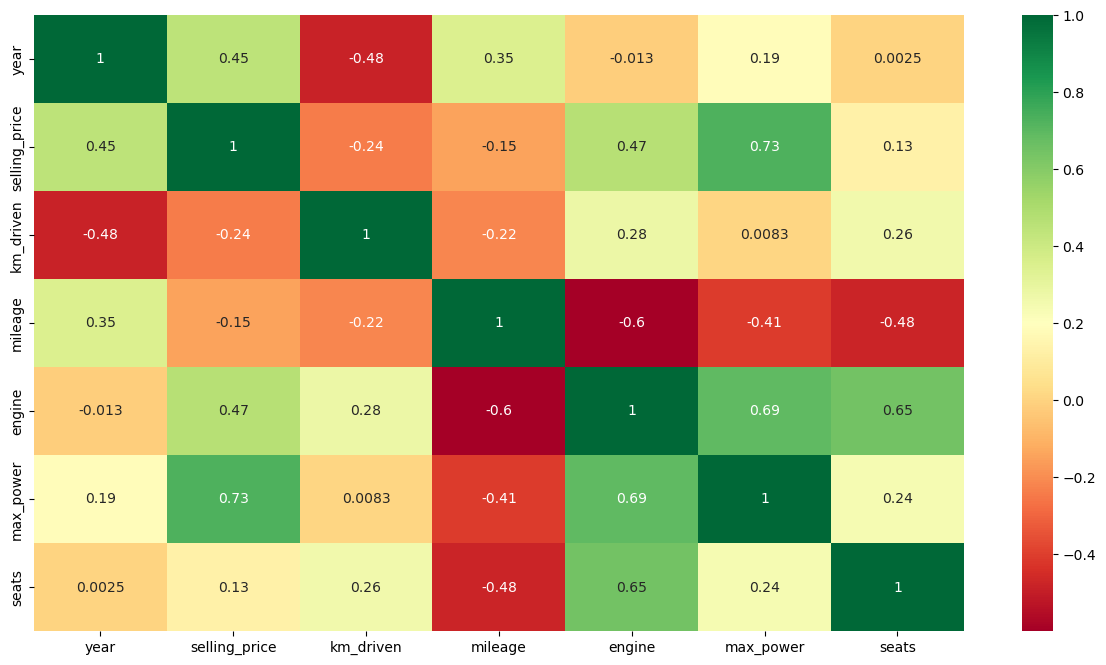

In [49]:
# heatmap for cars numerical data
plt.figure(figsize = [15,8])
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

# K-Means Segmentation using PCA

In [97]:
# selecting features for building a model
X = df[['year','selling_price','km_driven','fuel', 'seller_type', 'transmission', 'owner', 'mileage','engine','max_power','seats']]

In [98]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.708249,0.363123,-1.549743,-0.470968,-0.551993,1.308548,0.225262,0.453950,0.153731,-0.158768,0.057886
1,-0.059425,0.979048,-0.758004,-0.865786,-0.956159,-0.136046,-0.178356,0.515887,-0.488032,0.019313,0.176541
2,-1.186194,2.938774,1.645876,-1.312374,-0.491622,-0.533066,-0.015804,0.628120,0.257074,0.282988,-0.626466
3,-0.604485,0.844129,-1.114015,-0.635449,-0.404713,1.434264,-0.261896,-0.307641,-0.074211,0.449135,-0.030654
4,-0.907224,1.399593,1.219563,0.066710,0.623277,1.652610,-0.597222,0.089041,0.174681,0.310652,0.022812


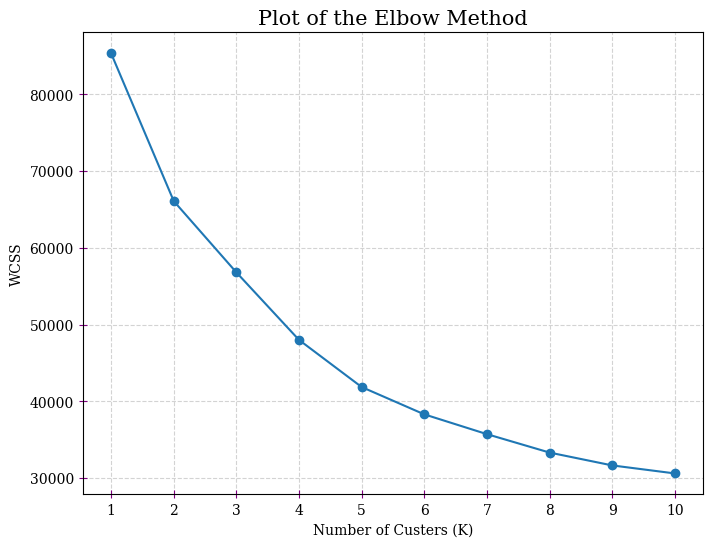

In [102]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss,marker='o')
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [103]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [104]:
# check the labels assigned to each data point
print(kmean.labels_)

[1 3 3 ... 3 1 1]


In [105]:
# adding a new feature of cluster labels to the dataset 3
df['clusters'] = kmean.labels_

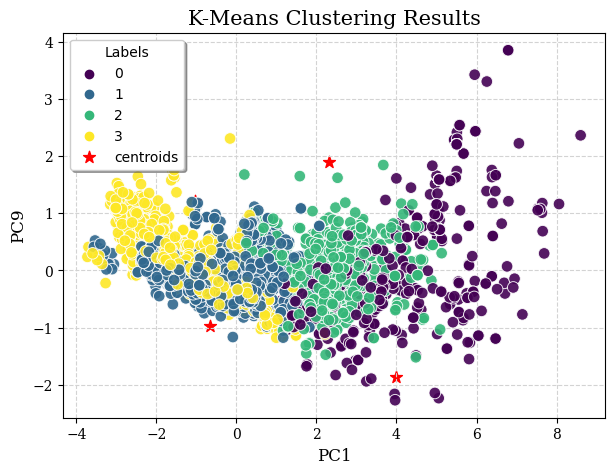

In [106]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

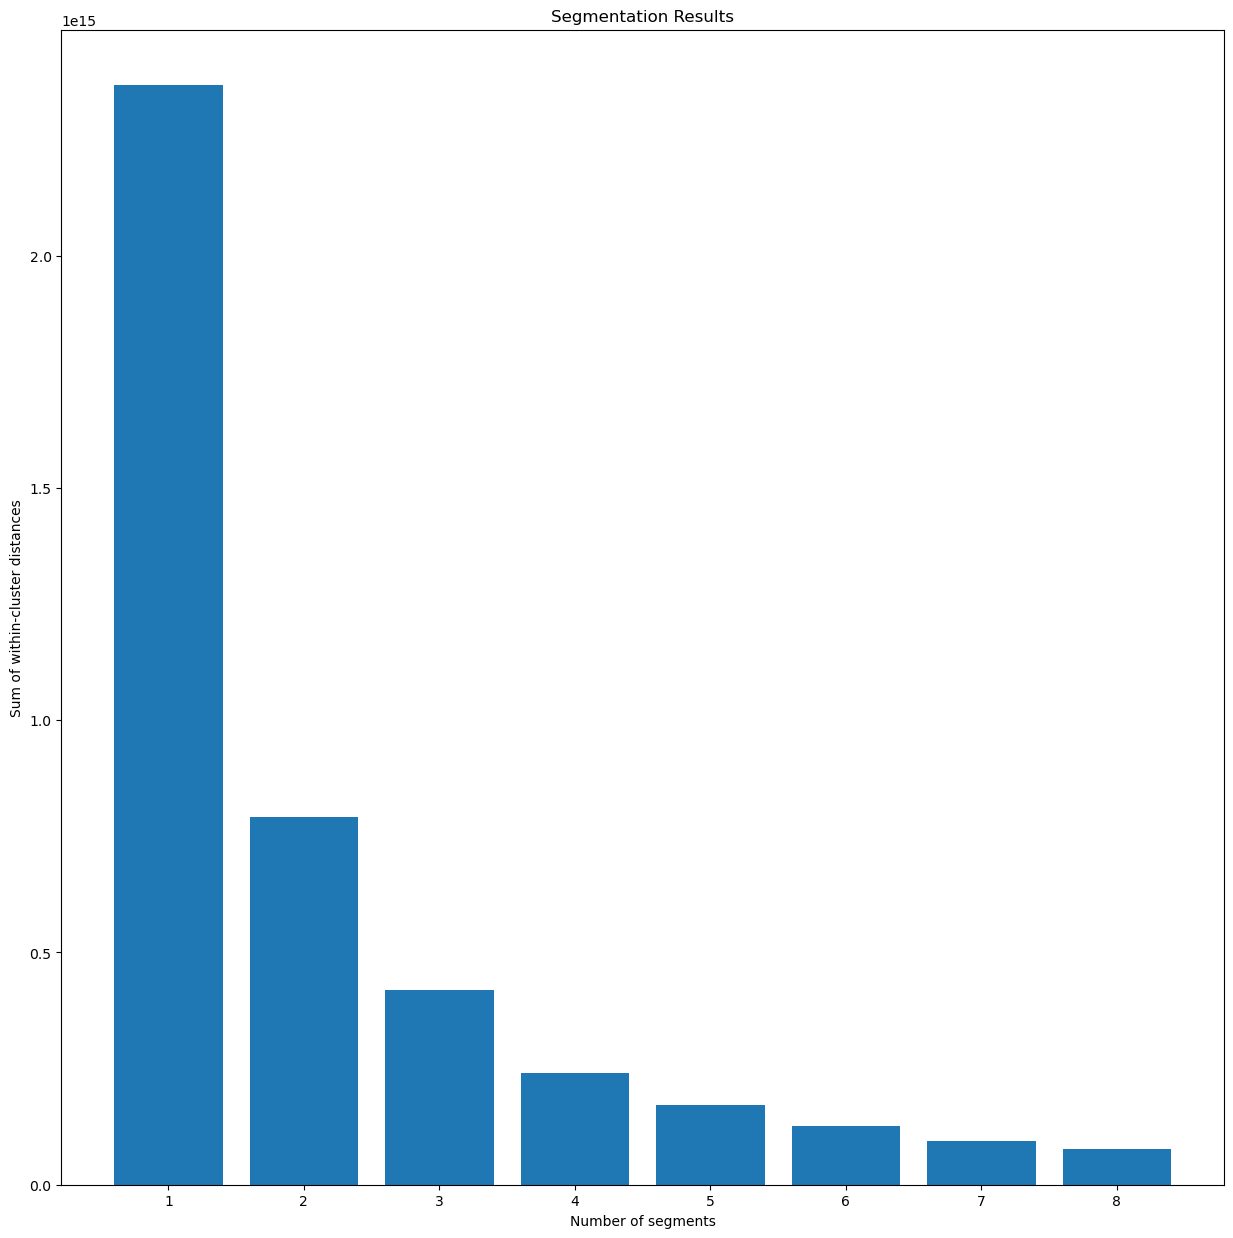

In [107]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(X)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()